In [345]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [346]:
np.random.seed(0)
def generate_parabolic_data(num_points, noise_std=0.1):
    """
    Generates a random parabolic dataset with added noise. 
    
    Args:
        num_points: Number of data points to generate.
        noise_std: Standard deviation of the Gaussian noise added to the data.
    
    Returns:
        A tuple of numpy arrays: (x_data, y_data)
    """
    x_data = np.random.uniform(-10, 10, size=num_points)  # Random x values between -1 and 1
    y_data = x_data**2 + np.random.normal(scale=noise_std, size=num_points)  # Parabolic curve with noise
    
    return x_data, y_data 

In [347]:
# generae random data
x, y = generate_parabolic_data(100, 10)

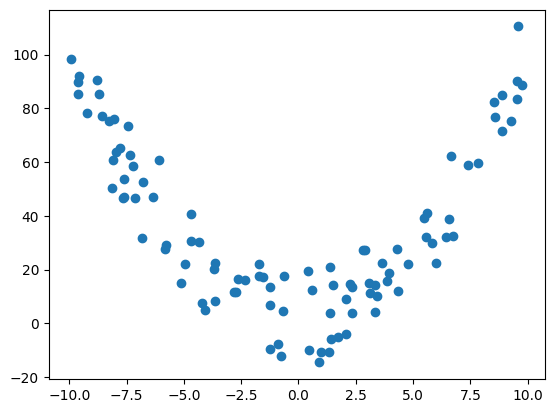

In [348]:
# visualize data
plt.scatter(x, y)

In [349]:
# function to generate n-dim dataframe
def create_nd_set(x, y, deg):

    df = pd.DataFrame({'x0': [1 for i in range(len(x))]})
    df['x1'] = x
    
    for i in range (2, deg+1):
        df[f'x{i}'] = df['x1'] ** i

    return df
    

In [350]:
# create n-dim dataframe
df = create_nd_set(x, y, 15)
df['y'] = y
df = df.sort_values(by='x1')
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
99,1,-9.906090,98.130629,-972.090885,9629.620254,-95391.889488,944960.687955,-9.360866e+06,9.272959e+07,-9.185877e+08,9.099613e+09,-9.014159e+10,8.929507e+11,-8.845650e+12,8.762581e+13,-8.680292e+14,98.305420
34,1,-9.624204,92.625302,-891.444806,8579.446657,-82570.344758,794673.841578,-7.648103e+06,7.360690e+07,-7.084079e+08,6.817862e+09,-6.561649e+10,6.315065e+11,-6.077748e+12,5.849348e+13,-5.629532e+14,89.945269
97,1,-9.597849,92.118707,-884.141446,8485.856159,-81445.966699,781706.096242,-7.502697e+06,7.200975e+07,-6.911388e+08,6.633445e+09,-6.366681e+10,6.110644e+11,-5.864904e+12,5.629046e+13,-5.402674e+14,85.223209
16,1,-9.595632,92.076154,-883.528899,8478.018220,-81351.943367,780623.315201,-7.490574e+06,7.187679e+07,-6.897033e+08,6.618139e+09,-6.350522e+10,6.093728e+11,-5.847317e+12,5.610870e+13,-5.383984e+14,92.181155
75,1,-9.216244,84.939156,-782.820003,7214.660277,-66492.070606,612807.157073,-5.647780e+06,5.205132e+07,-4.797177e+08,4.421195e+09,-4.074682e+10,3.755326e+11,-3.461000e+12,3.189742e+13,-2.939744e+14,78.304373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,1,9.273255,85.993262,797.437467,7394.841142,68574.249148,635906.513188,5.896923e+06,5.468368e+07,5.070957e+08,4.702428e+09,4.360681e+10,4.043771e+11,3.749892e+12,3.477371e+13,3.224654e+14,75.285736
70,1,9.529189,90.805449,865.302310,8245.629517,78574.164570,748748.088300,7.134962e+06,6.799041e+07,6.478935e+08,6.173899e+09,5.883226e+10,5.606237e+11,5.342289e+12,5.090769e+13,4.851090e+14,90.123033
72,1,9.535222,90.920454,866.946693,8266.528971,78823.186956,751596.567752,7.166640e+06,6.833550e+07,6.515942e+08,6.213095e+09,5.924324e+10,5.648974e+11,5.386422e+12,5.136073e+13,4.897359e+14,83.472906
20,1,9.572367,91.630207,877.117956,8396.094836,80370.499837,769335.907928,7.364366e+06,7.049441e+07,6.747983e+08,6.459417e+09,6.183191e+10,5.918777e+11,5.665671e+12,5.423388e+13,5.191466e+14,110.461714


In [351]:
# visualize relationships
# import seaborn as sns
# sns.pairplot(df)

In [335]:
# split input and output columns
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(x.shape)
print(y.shape)

(100, 16)
(100,)


In [336]:
#split train and test data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(80, 16)
(80,)
(20, 16)
(20,)


In [337]:
# load and fit model
reg = LinearRegression()

reg.fit(xtrain, ytrain)

LinearRegression()

In [338]:
# perform prediction
ypred = reg.predict(xtest)

In [339]:
# evaluate
r2_score(ytest, ypred)

0.8582793881027002

In [340]:
# predicted coefficients
reg.coef_

array([ 0.00000000e+00, -2.83506982e+00,  3.16390915e+00,  2.18480954e-01,
       -2.94638846e-01,  3.18027108e-02,  1.43195266e-02, -3.34053431e-03,
       -3.35916064e-04,  1.15910460e-04,  4.14293588e-06, -1.88740420e-06,
       -2.59096959e-08,  1.47218178e-08,  6.47339959e-11, -4.43767245e-11])

In [341]:
# predicted intercept
reg.intercept_

0.8967224792740325

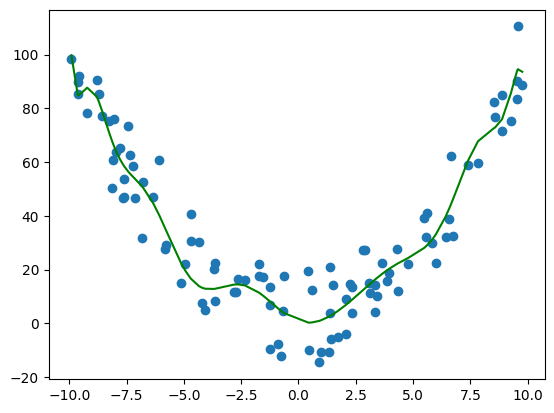

In [342]:
# visualize output
plt.scatter(x['x1'], y)
plt.plot(x['x1'], reg.predict(x), c='green')


In [343]:
# code to generate random color
def generate_random_hex_color():
    r = (np.random.randint(0, 255))
    g = np.random.randint(0, 255)
    b = np.random.randint(0, 255)
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

colors = [generate_random_hex_color() for i in range(21)]
colors

['#68de5b',
 '#2b3f9f',
 '#94c609',
 '#bc5b6f',
 '#a3534c',
 '#12714a',
 '#e2e1ab',
 '#838ce4',
 '#3a8171',
 '#802718',
 '#ba2463',
 '#458603',
 '#e279a8',
 '#bca11c',
 '#441ae0',
 '#f86db3',
 '#c9b5c5',
 '#a1877d',
 '#5e48f6',
 '#5487c3',
 '#d5db6c']

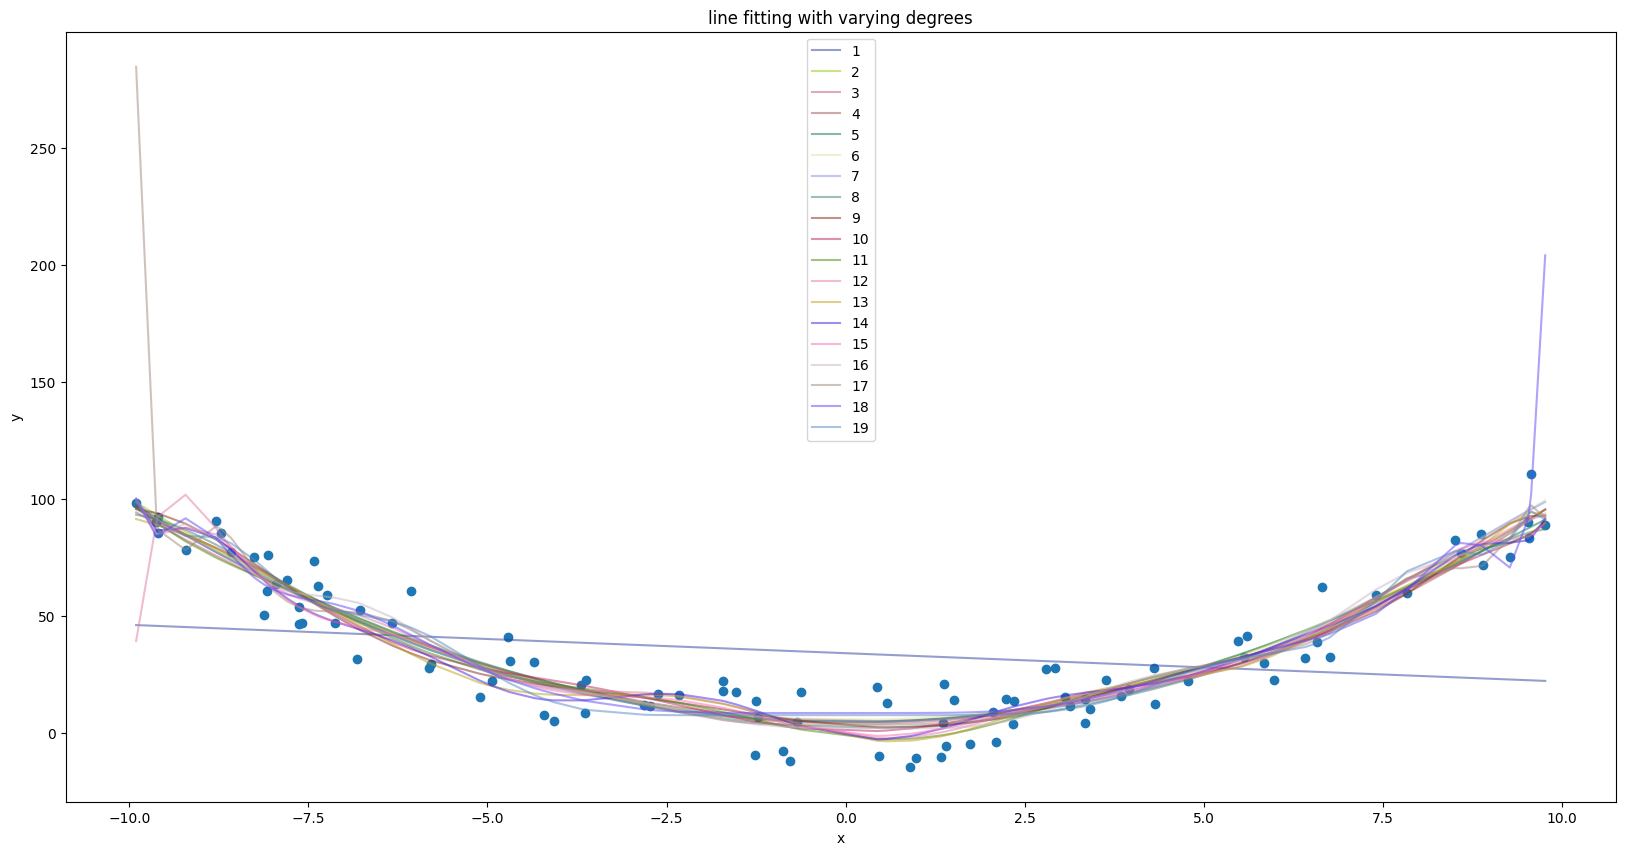

In [358]:
# finetune deg
r2s = []
plt.figure(figsize=(20, 10))

for deg in range(1, 20):
    df = create_nd_set(x, y, deg)
    df['y'] = y
    df = df.sort_values(by='x1')
    df

    xi = df.iloc[:, :-1]
    yo = df.iloc[:, -1]

    # print(x.shape)
    # print(y.shape)

    xtrain, xtest, ytrain, ytest = train_test_split(xi, yo, test_size = 0.2)
    # print(xtrain.shape)
    # print(ytrain.shape)
    # print(xtest.shape)
    # print(ytest.shape)

    reg = LinearRegression()
    reg.fit(xtrain, ytrain) 

    ypred = reg.predict(xtest)

    # print(deg, r2_score(ytest, ypred))
    r2s.append(r2_score(ytest, ypred))

    plt.plot(xi['x1'], reg.predict(xi), alpha = 0.5, c=colors[deg], label = deg)
    # print(deg, 1 - 1/(deg*100))
plt.scatter(xi['x1'], yo)
plt.title("line fitting with varying degrees")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()


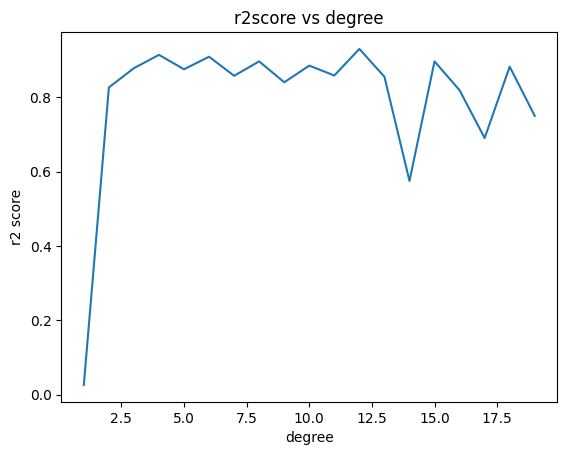

In [357]:
# r2score vs degree
plt.title("r2score vs degree")
plt.ylabel("r2 score")
plt.xlabel("degree")
plt.plot(range(1, 20), r2s)